n = 32, h1 = 0.050000
n = 32, h1 = 0.200000
n = 256, h1 = 0.050000
n = 256, h1 = 0.200000
n = 5000, h1 = 0.050000
n = 5000, h1 = 0.200000


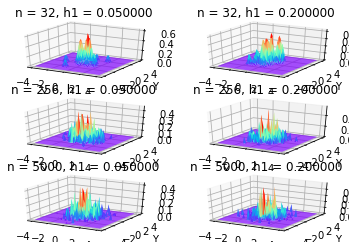

In [2]:
# -*- coding: utf-8 -*-
import math

import numpy as np

from scipy.stats import multivariate_normal

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

MU = np.zeros(2)
COV = np.eye(2)

def getData(size):
    data = np.random.multivariate_normal(MU, COV, size)
    return data

def gaussian(x, mu, cov):
    gauss = multivariate_normal(mean=mu, cov=cov)
    return gauss.pdf(x)

def area(data):
    size = 50
    X = []
    for i in range(data.shape[1]):
        x=np.linspace(-4, 4, size)
        X.append(x)
    return np.array(X)

def kernel(x, s, h):
    u = (x - s)/h
    v = h * h
    return gaussian(u,np.zeros(2),np.eye(2))/v

def kde(data, h):
    X = area(data)
    size = [len(X[0]), len(X[1])]
    kdepdf = np.zeros(size)
    for i in range(size[0]):
        for j in range(size[1]):
            sum1 = np.sum(kernel([X[0][i],X[1][j]], data, h)) 
            kdepdf[i,j] = sum1/n
    return X, kdepdf
   
n_set = [32, 256, 5000]
h1_set = [0.05, 0.2]
fig = plt.figure()

pos = 1
for n in n_set :
    for h1 in h1_set :
        s = "n = %d, h1 = %f" % (n, h1)
        print(s)
        data = getData(n)
        hn = 1/math.sqrt(n)
        X,P = kde(data, hn)
        ax = fig.add_subplot(len(n_set), len(h1_set), pos, projection='3d')
        pos = pos + 1
        px, py = np.meshgrid(X[0], X[1])
        ax.plot_surface(px, py, P, cmap='rainbow')
        ax.set_zlabel('Z')
        ax.set_ylabel('Y')
        ax.set_xlabel('X')
        ax.set_title(s)
        
plt.savefig("kde_result.png")
plt.show()